In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.io import readsav

from create_spec import create_spec
from fit2gauss import fit2gauss

import iris_lmsalpy.extract_irisL2data as extract_irisL2data
import iris_lmsalpy.fit_iris as fi

from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
path = '/Users/WilliamHenryAshfieldIV/dat/iris/'
filename = 'rast_data.sav'
fn = path+filename

In [3]:
ro = readsav(fn,verbose=False,python_dict=False)

In [4]:
data = ro.rast['data'][0]
wl = ro.rast['wl'][0]
err = ro.rast['err'][0]

In [5]:
data.shape

(2040, 197)

In [6]:
jj = np.where((wl > 1402) & (wl < 1404))[0]
data = data[:,jj]
err = err[:,jj]
wl = wl[jj]

In [7]:
time = np.arange(1100,1600)
N = len(time)

In [8]:
v_r = np.zeros(N)
v_b = np.zeros(N)
w_r = np.zeros(N)
w_b = np.zeros(N)
amp = np.zeros(N)

y1g_arr = np.zeros((N,79))
y2a_arr = np.zeros((N,79))
y2b_arr = np.zeros((N,79))


for i in range(0,N):
    
    t_i = time[i]
    
    dat = data[t_i,:]
    error = err[t_i,:]
        
    res = fit2gauss(wl,dat,error,chi_thr=20.)
    a2g = res["a2g"] # extract fit parameters
    a1g = res["a1g"]
    
    y1g_arr[i,:] = res["y1g"]
    y2a_arr[i,:] = res["y2a"]
    y2b_arr[i,:] = res["y2b"]

    #calculate Doppler velocities and wavelengths
    line = 1402.77
    c = 300.
    freq = c/line*1e3

    amp[i] = a1g[0]

    if a2g[1] < a2g[4]:
        v_b[i] = (a2g[1]-line)/line*3e5 # in km/s
        v_r[i] = (a2g[4]-line)/line*3e5
        #w_b[i] = a2g[2]*freq
        #w_r[i] = a2g[5]*freq

    else:
        v_r[i] = (a2g[1]-line)/line*3e5 # in km/s
        v_b[i] = (a2g[4]-line)/line*3e5
        #w_r[i] = a2g[2]*freq
        #w_b[i] = a2g[5]*freq

/Users/WilliamHenryAshfieldIV/synth_spec/fit2gauss.py:12: RuntimeWarning: divide by zero encountered in true_divide
  ef1 = np.exp( -0.5*( (x-a[1])/a[2] )**2 )
/Users/WilliamHenryAshfieldIV/synth_spec/fit2gauss.py:93: RuntimeWarning: invalid value encountered in sqrt
  sd = np.sqrt(m2)
/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
/Users/WilliamHenryAshfieldIV/synth_spec/fit2gauss.py:35: RuntimeWarning: invalid value encountered in double_scalars
  s = mvec[3]/mvec[2]**(1.5) # the skewness
/Users/WilliamHenryAshfieldIV/synth_spec/fit2gauss.py:38: RuntimeWarning: invalid value encountered in sqrt
  dv = np.sqrt(mvec[2]/f/(1.0-f)) # estimate of separation  v_red - v_blue
/Users/WilliamHenryAshfieldIV/synth_spec/fit2gauss.py:43: RuntimeWarning: invalid value encountered in sqrt
  a0 = dx*mvec[0]/(np.sqrt(2*np.pi*mvec[2]))


(0, 50)

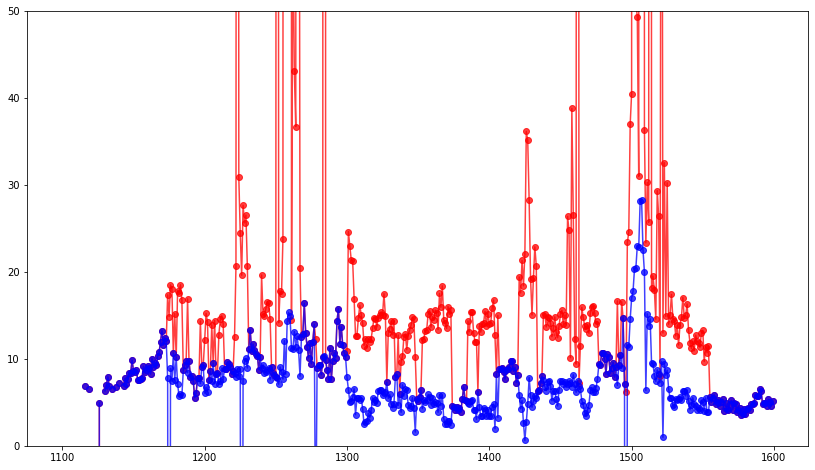

In [9]:
plt.figure(figsize=(14,8))
plt.plot(time,v_r,'r',alpha=0.75,marker='o')
plt.plot(time,v_b,'b',alpha=0.75,marker='o')
plt.ylim(0,50)

(1415, 1440)

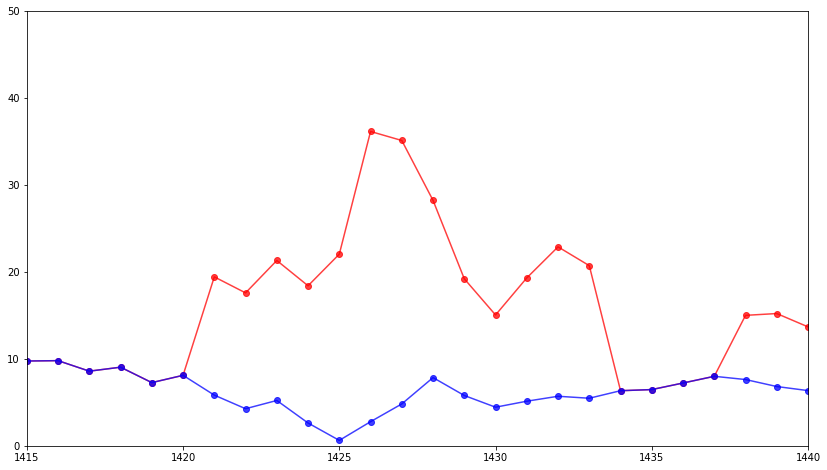

In [10]:
plt.figure(figsize=(14,8))
plt.plot(time,v_r,'r',alpha=0.75,marker='o')
plt.plot(time,v_b,'b',alpha=0.75,marker='o')
plt.ylim(0,50)
plt.xlim(1415,1440)

In [14]:
datr = data[1100:1600,:]

In [42]:
ts = np.arange(1420,1434)-1100
nn = len(ts)
nn

14

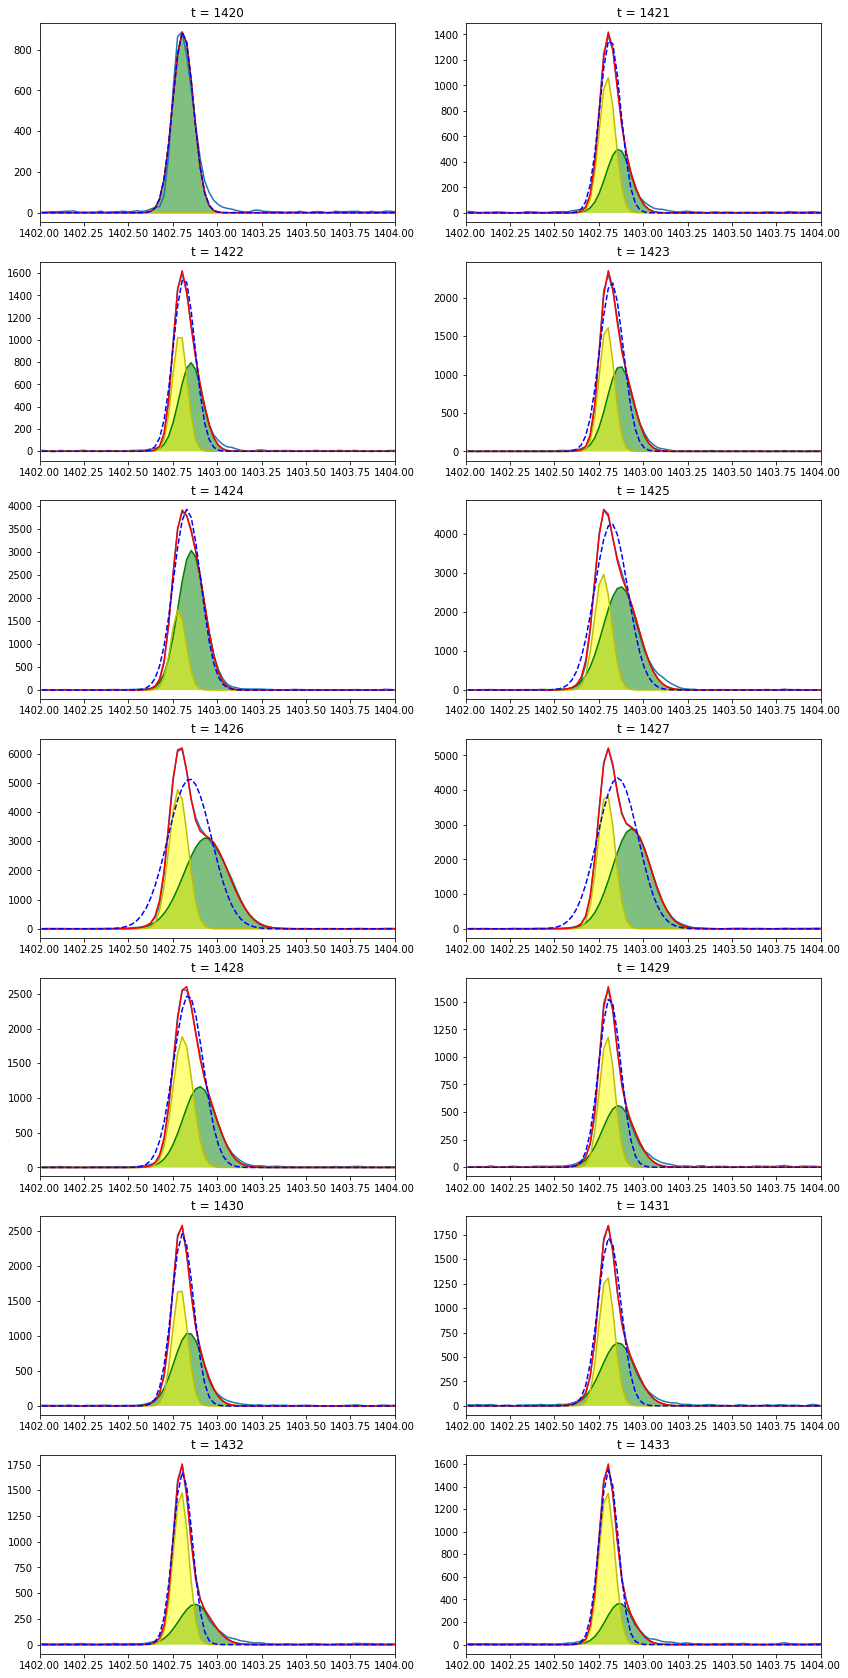

In [46]:
# plot 
fig = plt.figure(figsize=(14,30))
gs = gridspec.GridSpec(7,2)

for j in range(0,nn):

    k = ts[j]
    
    y2a = y2a_arr[k]
    y2b = y2b_arr[k]
    y1g = y1g_arr[k]
    dat = datr[k]



    ax1 = fig.add_subplot(gs[j])
    # spectrum
    ax1.plot(wl, dat)
    # peak 1
    ax1.plot(wl, y2a, "g")
    ax1.fill_between(wl, y2a.min(), y2a, facecolor="green", alpha=0.5)
    # peak 2
    ax1.plot(wl, y2b, "y")
    ax1.fill_between(wl, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 
    #both
    ax1.plot(wl,y2a+y2b, "r")
    # single fit
    ax1.plot(wl,y1g,'b--')

    ax1.set_xlim(1402.,1404.)
   # ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
    ax1.set_title('t = '+str(time[k]))

(1215, 1235)

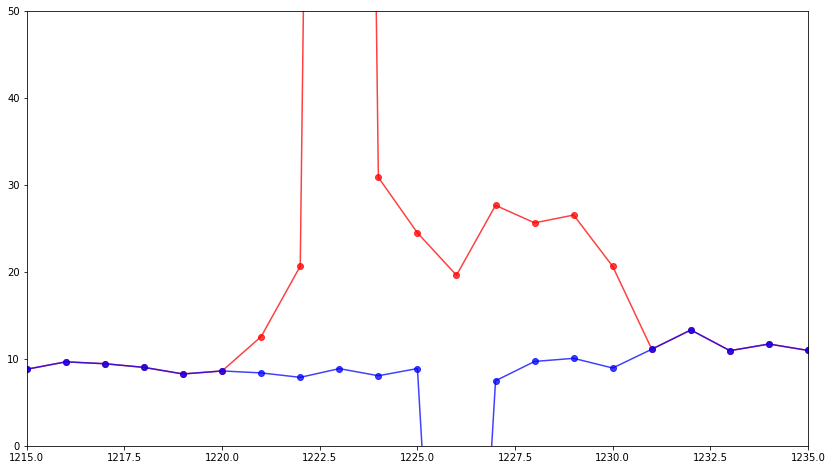

In [11]:
plt.figure(figsize=(14,8))
plt.plot(time,v_r,'r',alpha=0.75,marker='o')
plt.plot(time,v_b,'b',alpha=0.75,marker='o')
plt.ylim(0,50)
plt.xlim(1215,1235)

In [48]:
ts = np.arange(1220,1232)-1100
nn = len(ts)
nn

12

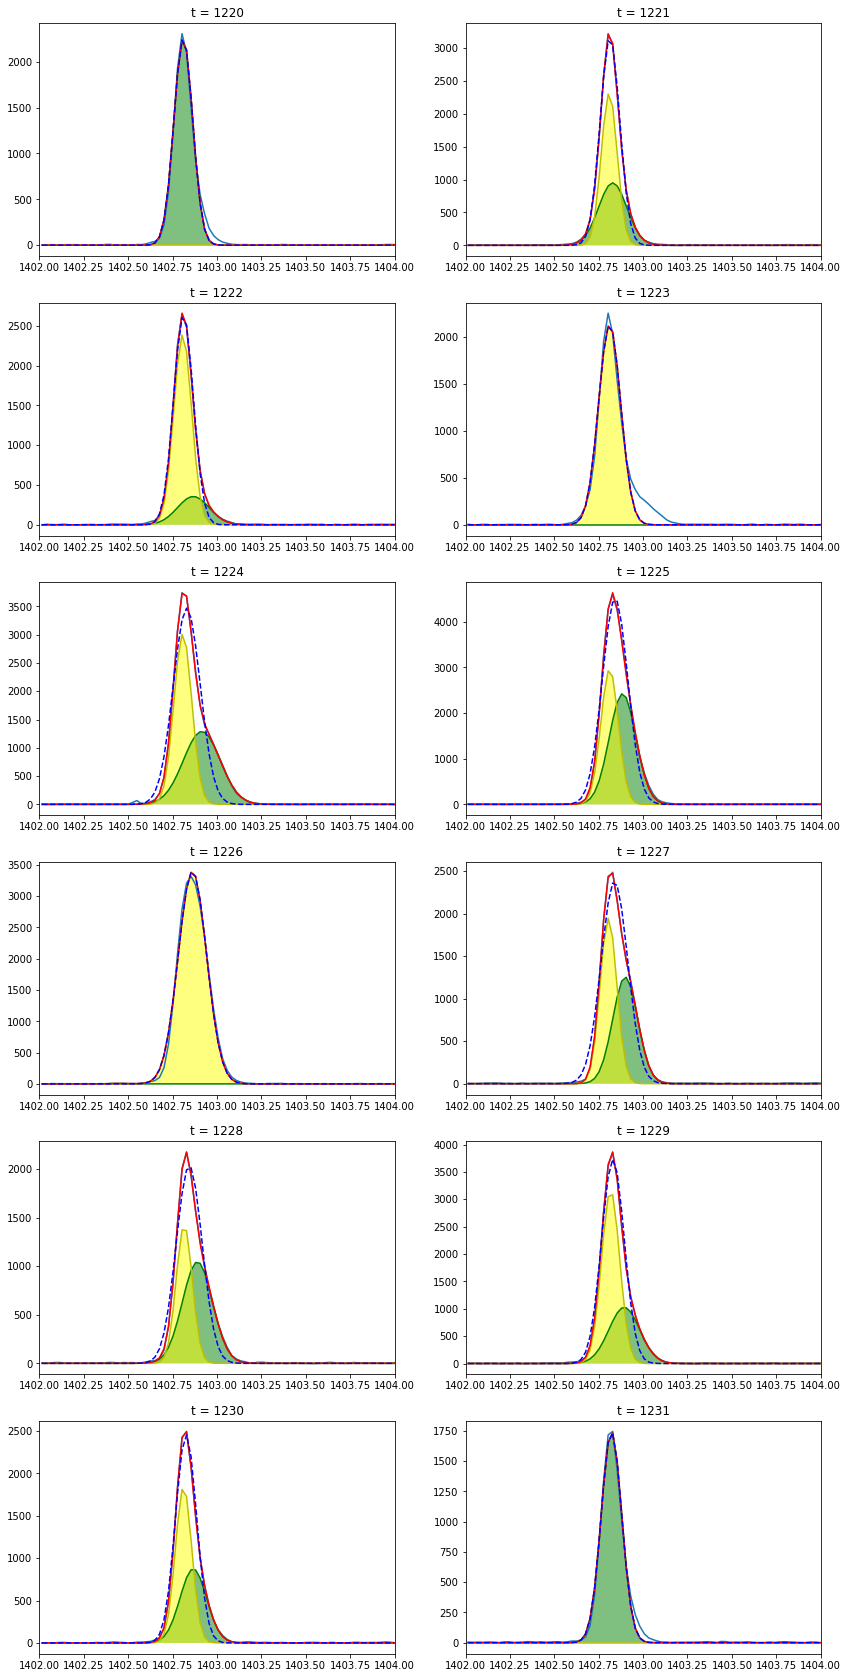

In [49]:
# plot 
fig = plt.figure(figsize=(14,30))
gs = gridspec.GridSpec(6,2)

for j in range(0,nn):

    k = ts[j]
    
    y2a = y2a_arr[k]
    y2b = y2b_arr[k]
    y1g = y1g_arr[k]
    dat = datr[k]



    ax1 = fig.add_subplot(gs[j])
    # spectrum
    ax1.plot(wl, dat)
    # peak 1
    ax1.plot(wl, y2a, "g")
    ax1.fill_between(wl, y2a.min(), y2a, facecolor="green", alpha=0.5)
    # peak 2
    ax1.plot(wl, y2b, "y")
    ax1.fill_between(wl, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 
    #both
    ax1.plot(wl,y2a+y2b, "r")
    # single fit
    ax1.plot(wl,y1g,'b--')

    ax1.set_xlim(1402.,1404.)
   # ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
    ax1.set_title('t = '+str(time[k]))

(1490, 1520)

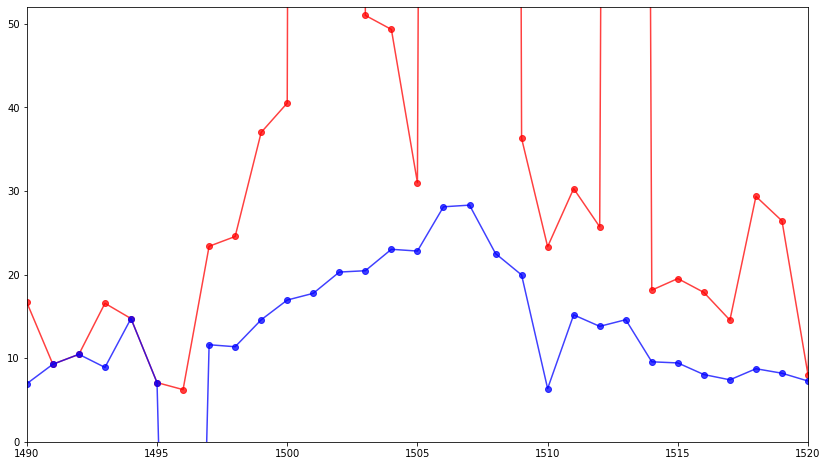

In [12]:
plt.figure(figsize=(14,8))
plt.plot(time,v_r,'r',alpha=0.75,marker='o')
plt.plot(time,v_b,'b',alpha=0.75,marker='o')
plt.ylim(0,52)
plt.xlim(1490,1520)

In [50]:
ts = np.arange(1494,1520)-1100
nn = len(ts)
nn

26

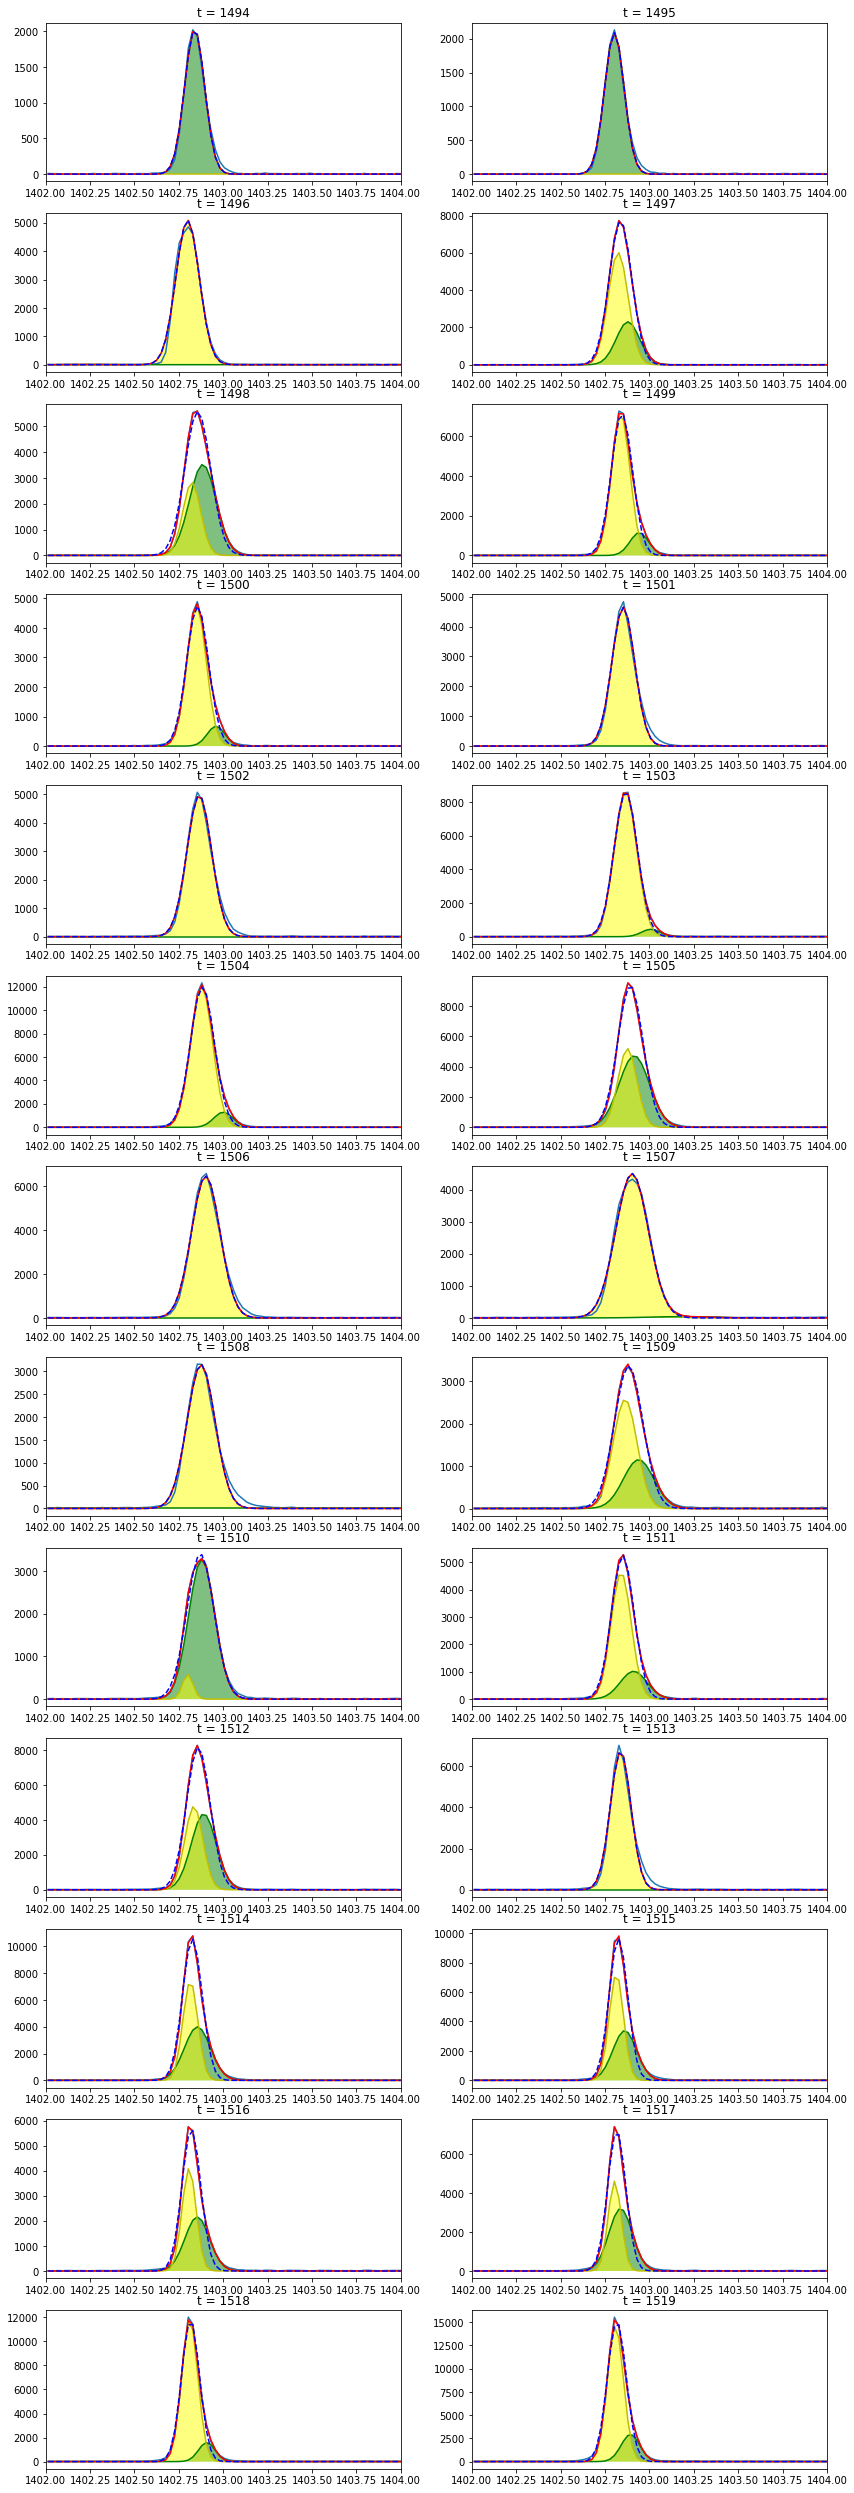

In [52]:
# plot 
fig = plt.figure(figsize=(14,45))
gs = gridspec.GridSpec(13,2)

for j in range(0,nn):

    k = ts[j]
    
    y2a = y2a_arr[k]
    y2b = y2b_arr[k]
    y1g = y1g_arr[k]
    dat = datr[k]



    ax1 = fig.add_subplot(gs[j])
    # spectrum
    ax1.plot(wl, dat)
    # peak 1
    ax1.plot(wl, y2a, "g")
    ax1.fill_between(wl, y2a.min(), y2a, facecolor="green", alpha=0.5)
    # peak 2
    ax1.plot(wl, y2b, "y")
    ax1.fill_between(wl, y2b.min(), y2b, facecolor="yellow", alpha=0.5) 
    #both
    ax1.plot(wl,y2a+y2b, "r")
    # single fit
    ax1.plot(wl,y1g,'b--')

    ax1.set_xlim(1402.,1404.)
   # ax1.set_xlabel("wavlength [$\AA$]",  fontsize=12)
    ax1.set_title('t = '+str(time[k]))

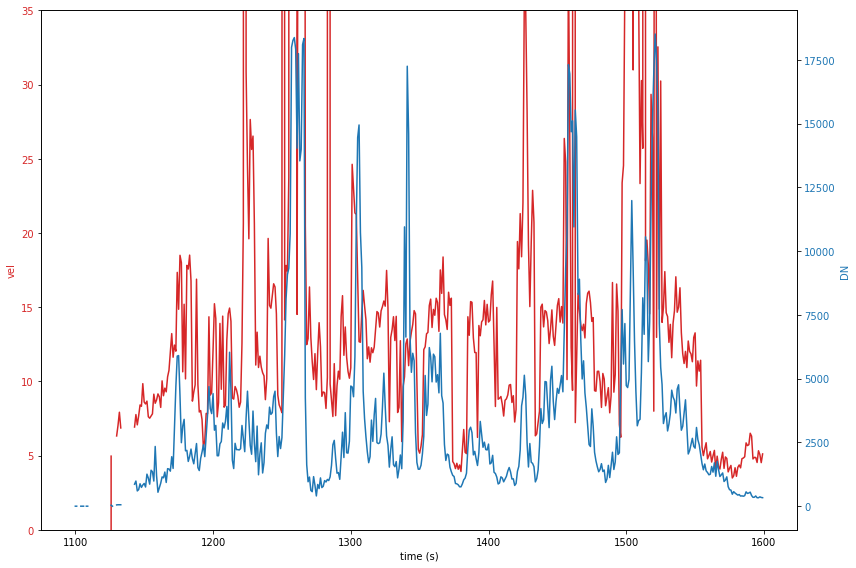

In [13]:
fig, ax1 = plt.subplots(figsize = (12,8))

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('vel', color=color)
ax1.plot(time,v_r, color=color)
ax1.tick_params(axis='y', labelcolor=color)

#ax1.set_xlim(1400,1550)
ax1.set_ylim(0,35)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('DN', color=color)  # we already handled the x-label with ax1
ax2.plot(time,amp, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()